In [1]:

# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


%matplotlib inline

In [2]:
# load the data
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

# Data contains

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

# Data Wrangling

In [3]:
#exploration data shape 
df.shape

(303, 14)

In [4]:
#the basic information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Are there duplicate values in the data?


In [5]:
df.duplicated().any()

True

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().any()

False

In [9]:
#Find out the null values in the data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#describe data 
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [11]:
#The number of people with & without heart disease
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

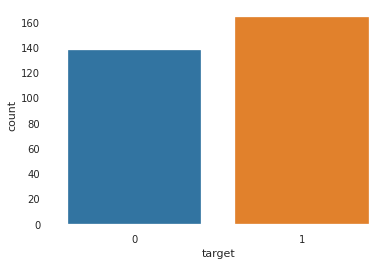

In [12]:
sns.countplot(x="target", data=df)
plt.show()

# Explainability data 

What is the effect of age on heart disease?

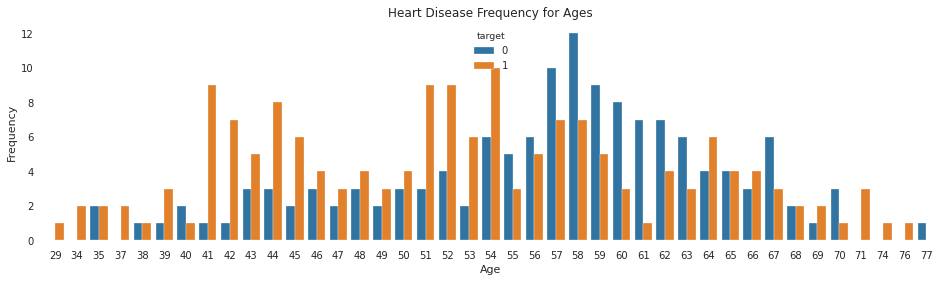

In [13]:
plt.figure(figsize=(16,4))
sns.countplot(x=df.age, hue=df.target)
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

what about sex

In [14]:
df['sex'].value_counts()
#Sex (0 = female, 1= male)

1    206
0     96
Name: sex, dtype: int64

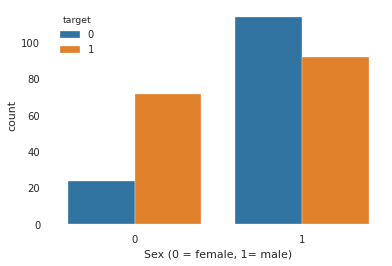

In [15]:
sns.countplot(x=df.sex, hue=df.target, data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

chest pain type"cp"

In [16]:
df.cp.value_counts()


0    143
2     86
1     50
3     23
Name: cp, dtype: int64

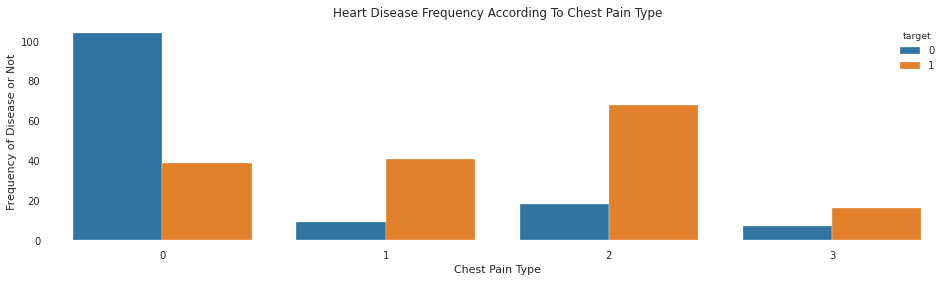

In [17]:
plt.figure(figsize=(16,4))
sns.countplot(x=df.cp, hue=df.target, data=df)
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

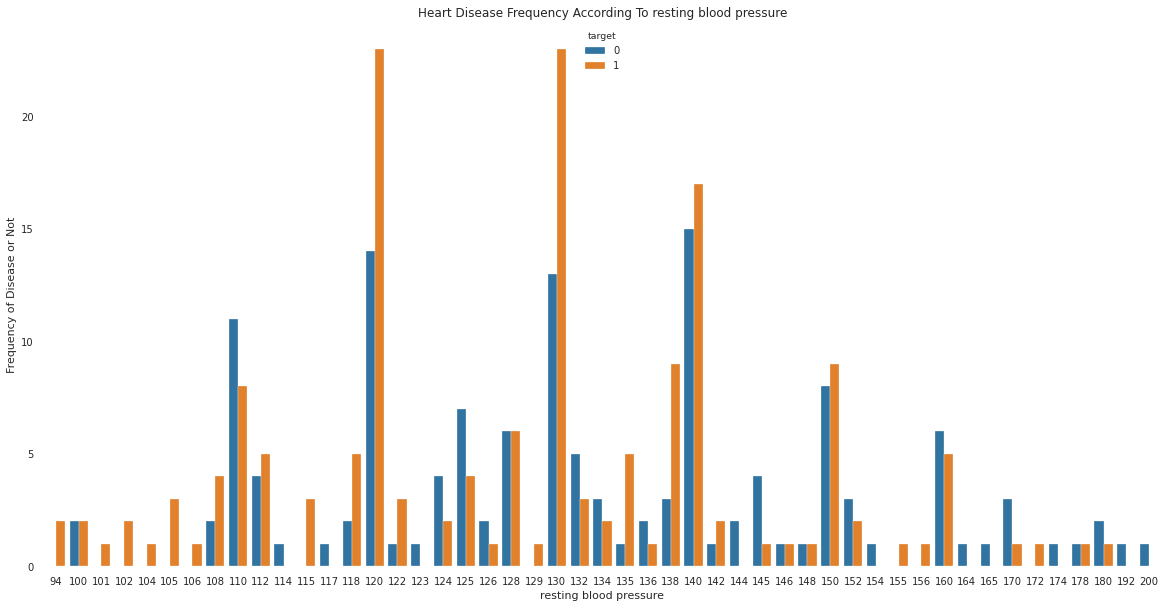

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.trestbps, hue=df.target, data=df)
plt.title('Heart Disease Frequency According To resting blood pressure')
plt.xlabel('resting blood pressure')
plt.ylabel('Frequency of Disease or Not')
plt.show()

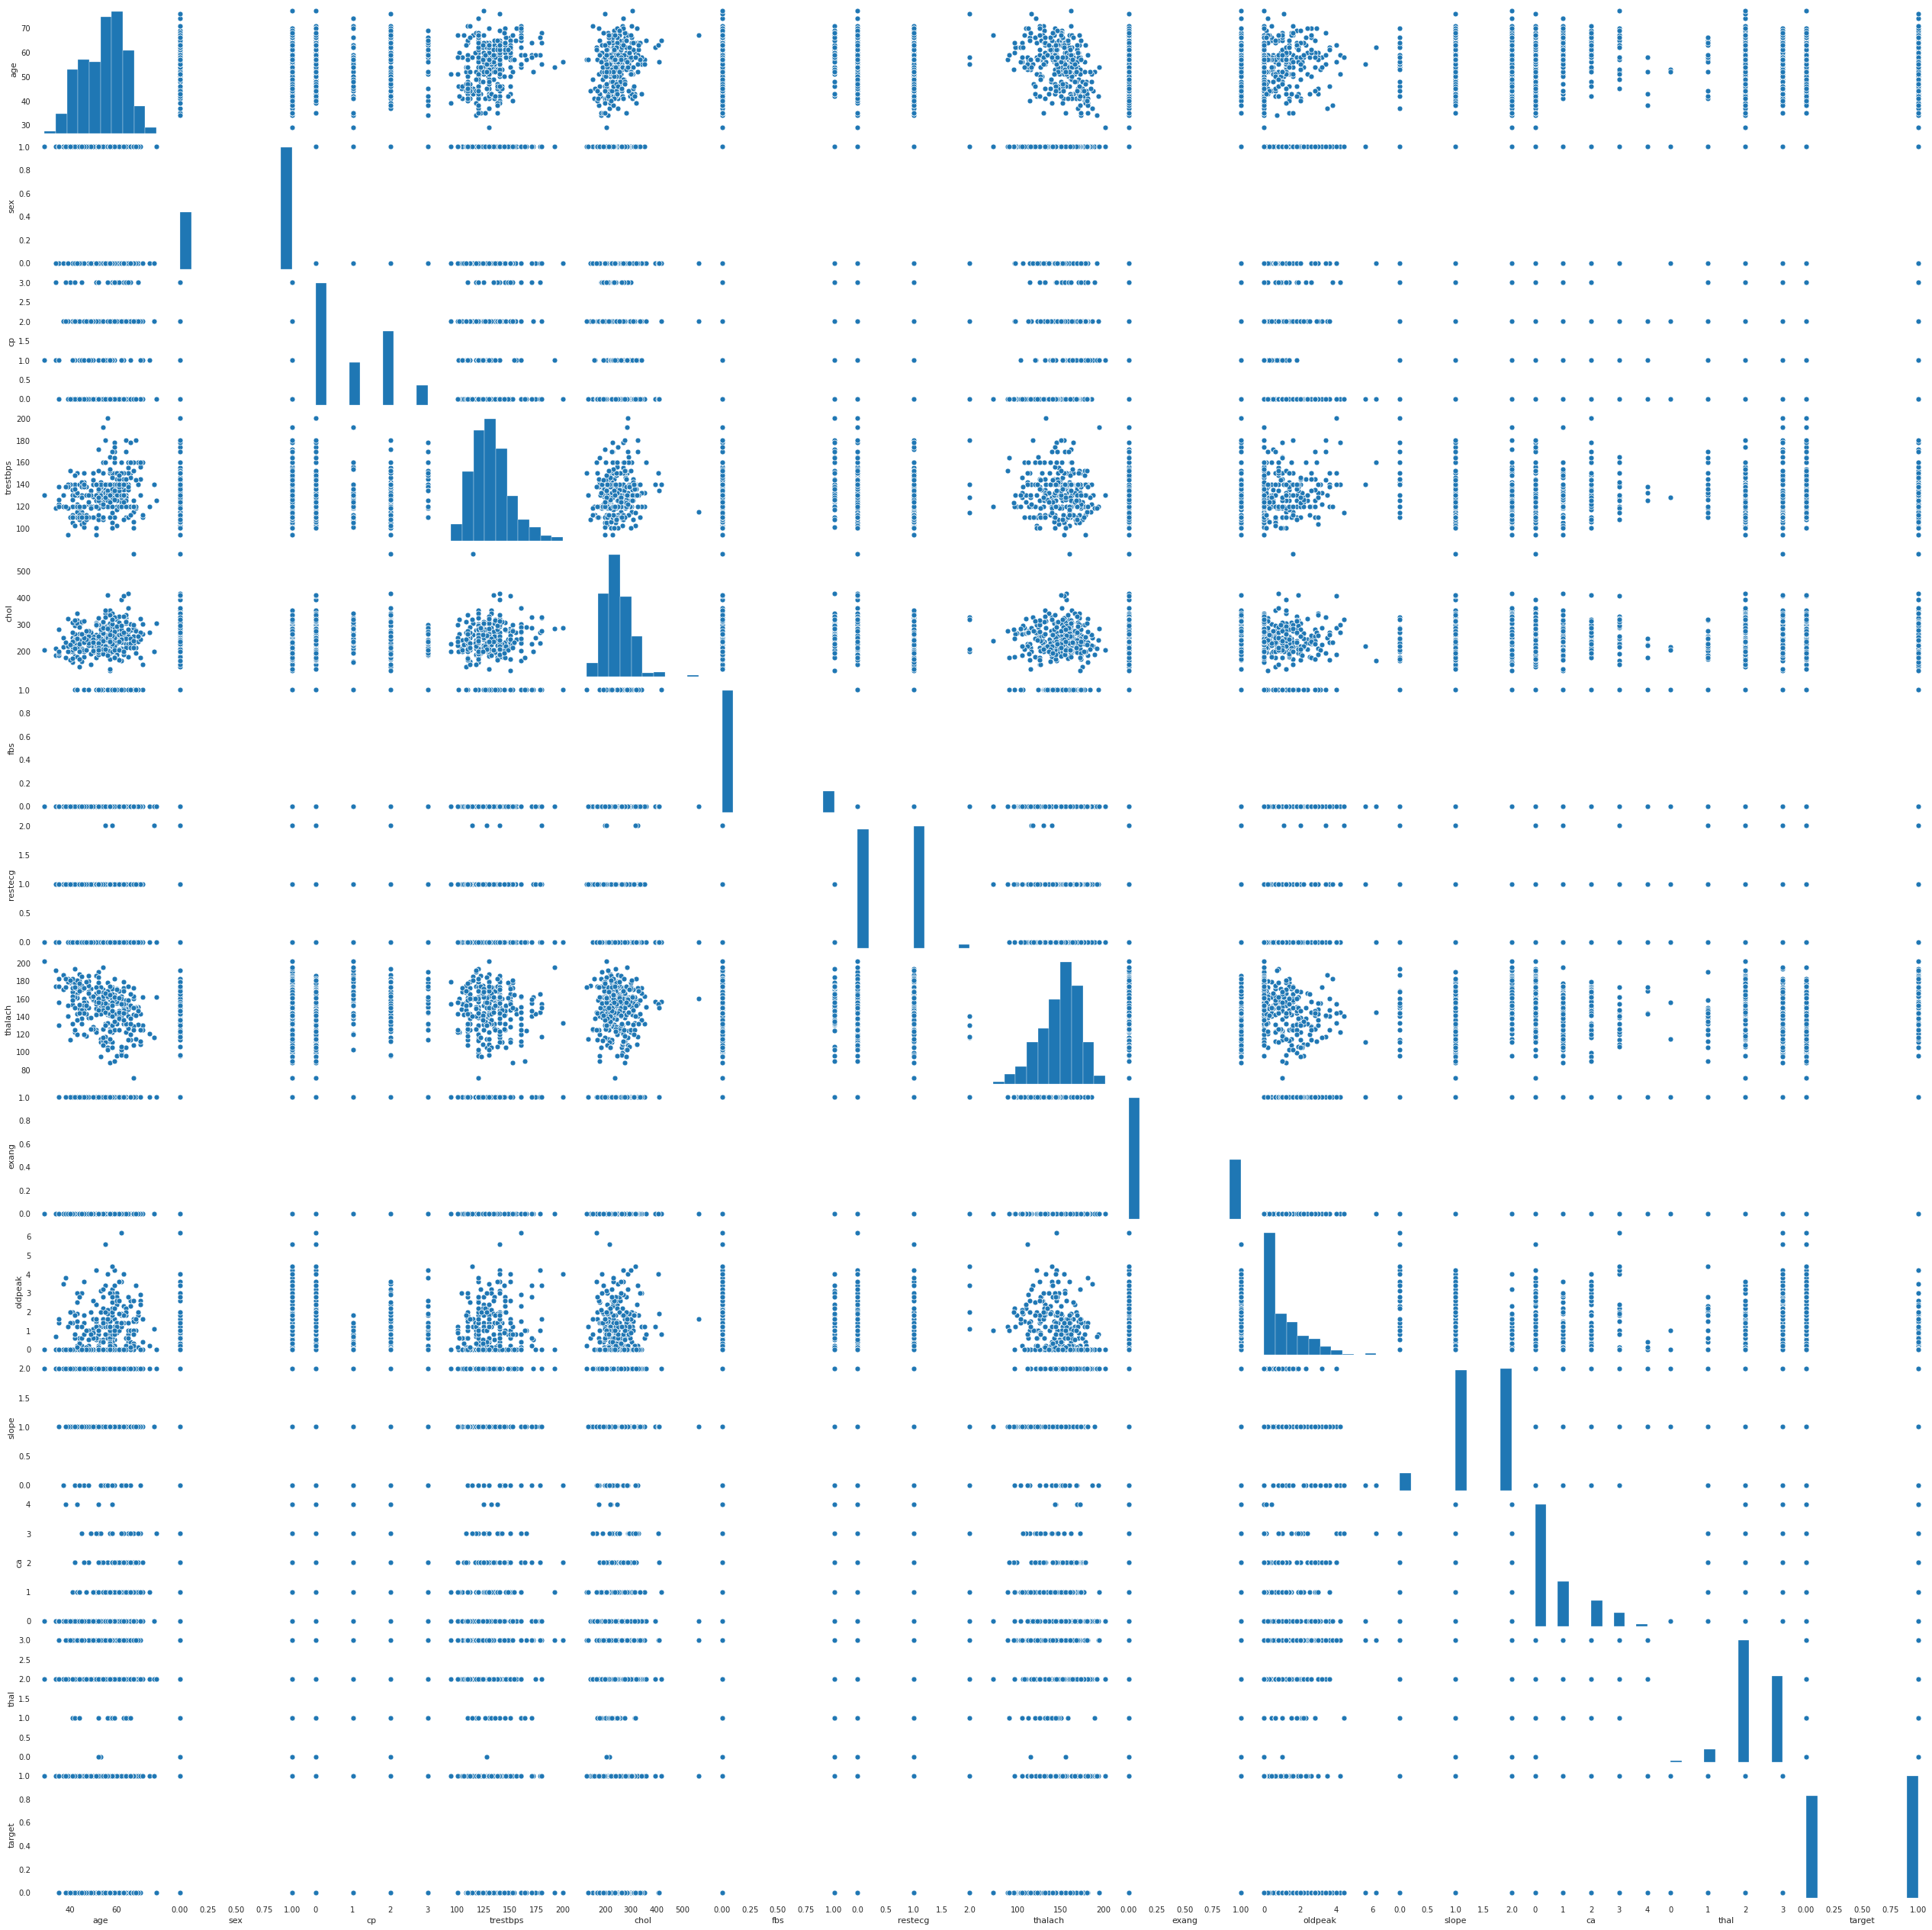

In [19]:
sns.pairplot(df)
plt.show()

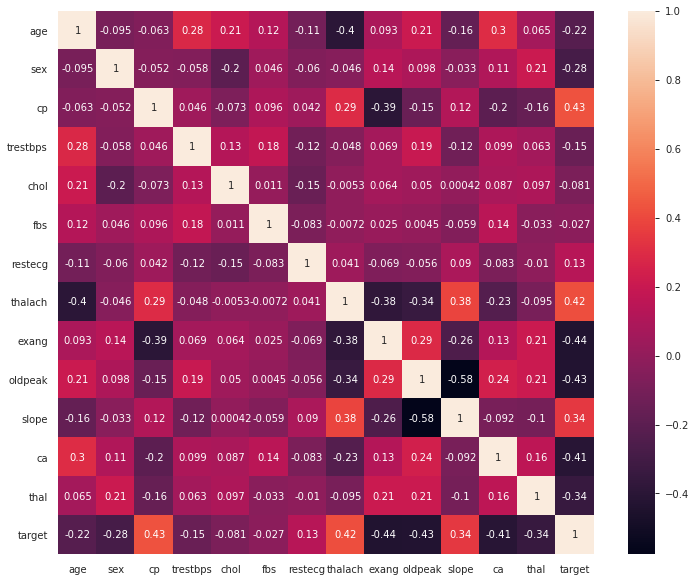

In [20]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
ax = sns.heatmap(df.corr(), xticklabels=1, annot=True )

pandas_profiling library Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

Type inference: detect the types of columns in a dataframe.

Essentials: type, unique values, missing values

* Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range

* Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

* Most frequent values

* Histogram

* Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices

* Missing values matrix, count, heatmap and dendrogram of missing values

* Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

In [21]:

profile = ProfileReport(df.corr(), title='Pandas profiling report for Heart Diseases dataset  ' , html={'style':{'full_width':True}})

profile.to_notebook_iframe()

Scaling the data

data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
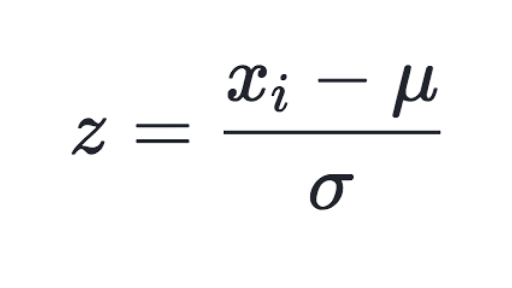

In [22]:
sc_X = StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(df))
X.head()

0         1         2         3         4         5         6   \
0  0.949794  0.682656  1.976470  0.764066 -0.261285  2.389793 -1.002541   
1 -1.928548  0.682656  1.005911 -0.091401  0.067741 -0.418446  0.901657   
2 -1.485726 -1.464866  0.035352 -0.091401 -0.822564 -0.418446 -1.002541   
3  0.174856  0.682656  0.035352 -0.661712 -0.203222 -0.418446  0.901657   
4  0.285561 -1.464866 -0.935208 -0.661712  2.080602 -0.418446  0.901657   

         7         8         9         10        11        12        13  
0  0.018826 -0.698344  1.084022 -2.271182 -0.714911 -2.147955  0.917313  
1  1.636979 -0.698344  2.118926 -2.271182 -0.714911 -0.513994  0.917313  
2  0.980971 -0.698344  0.307844  0.979514 -0.714911 -0.513994  0.917313  
3  1.243374 -0.698344 -0.209608  0.979514 -0.714911 -0.513994  0.917313  
4  0.587366  1.431958 -0.382092  0.979514 -0.714911 -0.513994  0.917313

In [23]:
X=df.drop('target',axis=1)
y=df['target']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [25]:


RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=3,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))


RandomForestClassifierModel Train Score is :  0.900497512437811
RandomForestClassifierModel Test Score is :  0.801980198019802


In [26]:

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1 1 0 1 1 0 0 1 0 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.45355559 0.54644441]
 [0.10028994 0.89971006]
 [0.7593153  0.2406847 ]
 [0.1747806  0.8252194 ]
 [0.12367343 0.87632657]
 [0.64364727 0.35635273]
 [0.68772817 0.31227183]
 [0.11114215 0.88885785]
 [0.63931622 0.36068378]
 [0.16735557 0.83264443]]


Text(0.5, 11.5, 'Predicted label')

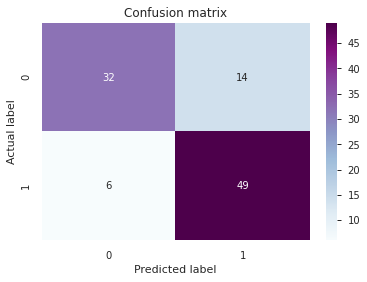

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:


#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  81
